importing the kaggle dataset


In [1]:
!pip install kaggle

In [2]:
# Create the .kaggle directory
!mkdir -p ~/.kaggle

# Upload the kaggle.json file from your local machine to Colab
from google.colab import files
files.upload()

# Move the kaggle.json file to the .kaggle directory
!mv kaggle.json ~/.kaggle/

# Set permissions for the kaggle.json file
!chmod 600 ~/.kaggle/kaggle.json

# Verify the setup by listing datasets
!kaggle datasets list


Saving kaggle.json to kaggle.json
ref                                                     title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
waqi786/global-air-quality-dataset                      Global Air Quality Dataset 🌍🌫️                  258KB  2024-07-28 10:35:09            844         24  1.0              
waqi786/cars-dataset-2010-2020                          Cars Dataset (2010-2020)                         96KB  2024-07-23 05:49:46           1303         28  1.0              
rabieelkharoua/students-performance-dataset             📚 Students Performance Dataset 📚                 66KB  2024-06-12 23:09:20          24387        502  1.0              
ihelon/coffee-sales                                     Coffee Sales                  

In [3]:
!kaggle competitions download -c dogs-vs-cats

 99% 808M/812M [00:12<00:00, 57.3MB/s]
100% 812M/812M [00:12<00:00, 68.7MB/s]


In [4]:
!ls

dogs-vs-cats.zip  sample_data


In [5]:
# Extracting the data
from zipfile import ZipFile
dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('done')

done


In [6]:
from zipfile import ZipFile
dataset = '/content/test1.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('done')

done


In [7]:
from zipfile import ZipFile
dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('done')

done


In [8]:
import os
path,dirs,files = next(os.walk('/content/train'))
file_count = len(files)
print(file_count)

25000


In [9]:
path,dirs,files = next(os.walk('/content/test1'))
file_count = len(files)
print(file_count)

12500


In [10]:
# os.listdir('/content/train')

In [11]:
# Importing the dependencies
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

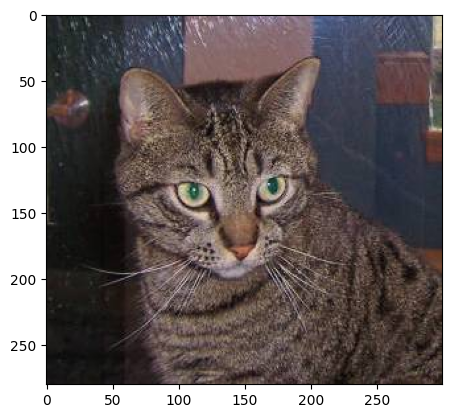

In [12]:
img = mpimg.imread('/content/train/cat.1.jpg')
plt.imshow(img)
plt.show()

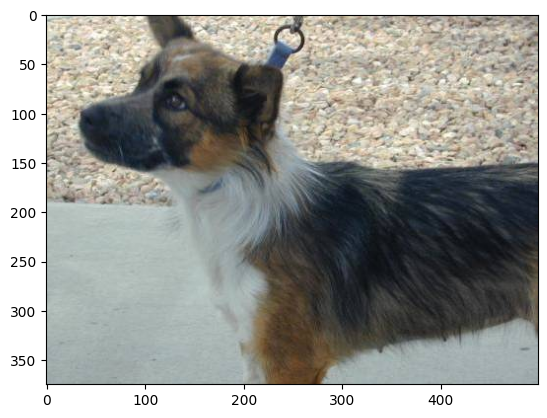

In [13]:
img = mpimg.imread('/content/train/dog.3.jpg')
plt.imshow(img)
plt.show()

In [14]:
file_names = os.listdir('/content/train/')
for i in range(10):
    name = file_names[i]
    print(name[:3])

cat
dog
cat
cat
dog
dog
dog
cat
cat
dog


In [15]:
file_names = os.listdir('/content/train/')
dog_count = 0
cat_count = 0
for i in file_names:
    if i[:3] == 'dog':
        dog_count += 1
    else:
        cat_count += 1
print(dog_count)
print(cat_count)

12500
12500


Resizing


In [16]:
# creating new dir
os.mkdir('/content/resized_train')

In [32]:
original_folder = '/content/train/'
new_folder = '/content/resized_train/'

for i in range(2000):
    filename = os.listdir(original_folder)[i]
    img_path = original_folder + filename
    img = Image.open(img_path)
    img = img.resize((224,224))
    img= img.convert('RGB')
    img.save(new_folder + filename)

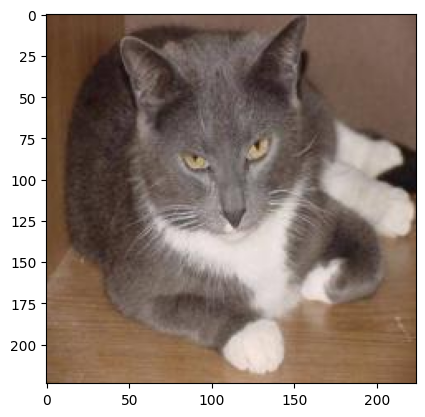

In [33]:
# display resized image
img = mpimg.imread('/content/resized_train/cat.10045.jpg')
plt.imshow(img)
plt.show()

In [34]:
# creating Labels cat-->0 and dogs-->1
filename = os.listdir('/content/resized_train/')

labels=[]
for i in range(2000):
    file = filename[i]
    if file[:3] == 'cat':
        labels.append(0)
    else:
        labels.append(1)

In [35]:
filename[:5]

['cat.11555.jpg',
 'dog.2970.jpg',
 'cat.6218.jpg',
 'cat.3833.jpg',
 'dog.379.jpg']

In [36]:
labels[:5]

[0, 1, 0, 0, 1]

In [37]:
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1038  962]


In [38]:
import cv2
import glob

In [39]:
image_directory = '/content/resized_train/'
image_extension = ['png', 'jpg']

files=[]
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]
imgs = np.asarray([cv2.imread(file) for file in files])

In [40]:
type(imgs)

numpy.ndarray

In [41]:
imgs.shape

(2000, 224, 224, 3)

array([[[19, 30, 22],
        [27, 40, 32],
        [42, 53, 50],
        ...,
        [ 8,  8, 14],
        [ 5,  5, 11],
        [ 1,  1,  7]],

       [[30, 41, 33],
        [28, 40, 34],
        [33, 44, 41],
        ...,
        [ 8,  8, 14],
        [ 5,  5, 11],
        [ 2,  2,  8]],

       [[25, 35, 29],
        [37, 49, 43],
        [53, 64, 61],
        ...,
        [ 8,  8, 14],
        [ 5,  5, 11],
        [ 2,  2,  8]],

       ...,

       [[35, 49, 55],
        [39, 53, 59],
        [43, 57, 63],
        ...,
        [63, 78, 80],
        [62, 77, 79],
        [61, 76, 78]],

       [[35, 49, 55],
        [38, 52, 58],
        [43, 57, 63],
        ...,
        [62, 77, 79],
        [61, 76, 78],
        [60, 75, 77]],

       [[35, 49, 55],
        [38, 52, 58],
        [42, 56, 62],
        ...,
        [62, 77, 79],
        [60, 75, 77],
        [60, 75, 77]]], dtype=uint8)
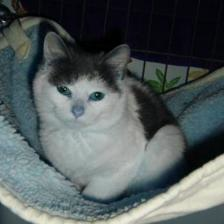

In [42]:
imgs[0]

In [43]:
x=imgs
y=np.asarray(labels)

In [44]:
x.shape

(2000, 224, 224, 3)

In [45]:
y.shape

(2000,)

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [49]:
print(x_train.shape, x_test.shape)

(1600, 224, 224, 3) (400, 224, 224, 3)


In [51]:
# Scaling the Data
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [52]:
x_train_scaled[0]

array([[[0.52941176, 0.47058824, 0.39607843],
        [0.52941176, 0.47058824, 0.39607843],
        [0.53333333, 0.4745098 , 0.4       ],
        ...,
        [0.42745098, 0.37254902, 0.29803922],
        [0.42745098, 0.37254902, 0.29803922],
        [0.42745098, 0.37254902, 0.29803922]],

       [[0.53333333, 0.4745098 , 0.4       ],
        [0.53333333, 0.4745098 , 0.4       ],
        [0.5372549 , 0.47843137, 0.40392157],
        ...,
        [0.42745098, 0.37254902, 0.29803922],
        [0.42745098, 0.37254902, 0.29803922],
        [0.42745098, 0.37254902, 0.29803922]],

       [[0.53333333, 0.4745098 , 0.4       ],
        [0.53333333, 0.4745098 , 0.4       ],
        [0.5372549 , 0.47843137, 0.40392157],
        ...,
        [0.42745098, 0.37254902, 0.29803922],
        [0.42745098, 0.37254902, 0.29803922],
        [0.42745098, 0.37254902, 0.29803922]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

BUILDING NEURAL NETWORK MODEL

In [53]:
import tensorflow as tf
import tensorflow_hub as hub

In [54]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [55]:
num_class = 2
model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_class)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [56]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

In [57]:
model.fit(x_train_scaled,y_train,epochs=5)

Epoch 1/5
50/50 [==============================] - 83s 2s/step - loss: 0.2577 - acc: 0.8881
Epoch 2/5
50/50 [==============================] - 73s 1s/step - loss: 0.0707 - acc: 0.9750
Epoch 3/5
50/50 [==============================] - 76s 2s/step - loss: 0.0480 - acc: 0.9862
Epoch 4/5
50/50 [==============================] - 70s 1s/step - loss: 0.0379 - acc: 0.9900
Epoch 5/5
50/50 [==============================] - 68s 1s/step - loss: 0.0290 - acc: 0.9937


In [58]:
import pickle

In [59]:
pickle.dump(model,open('cat_dog_model.pkl','wb'))

Path of the image to be predicted: /content/cat.jpeg


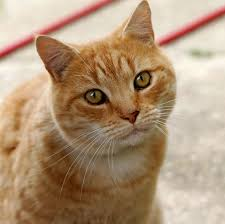

1/1 [==============================] - 1s 884ms/step
[[ 5.2975106 -3.8695655]]
0
The image represents a Cat


In [62]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/dog.webp


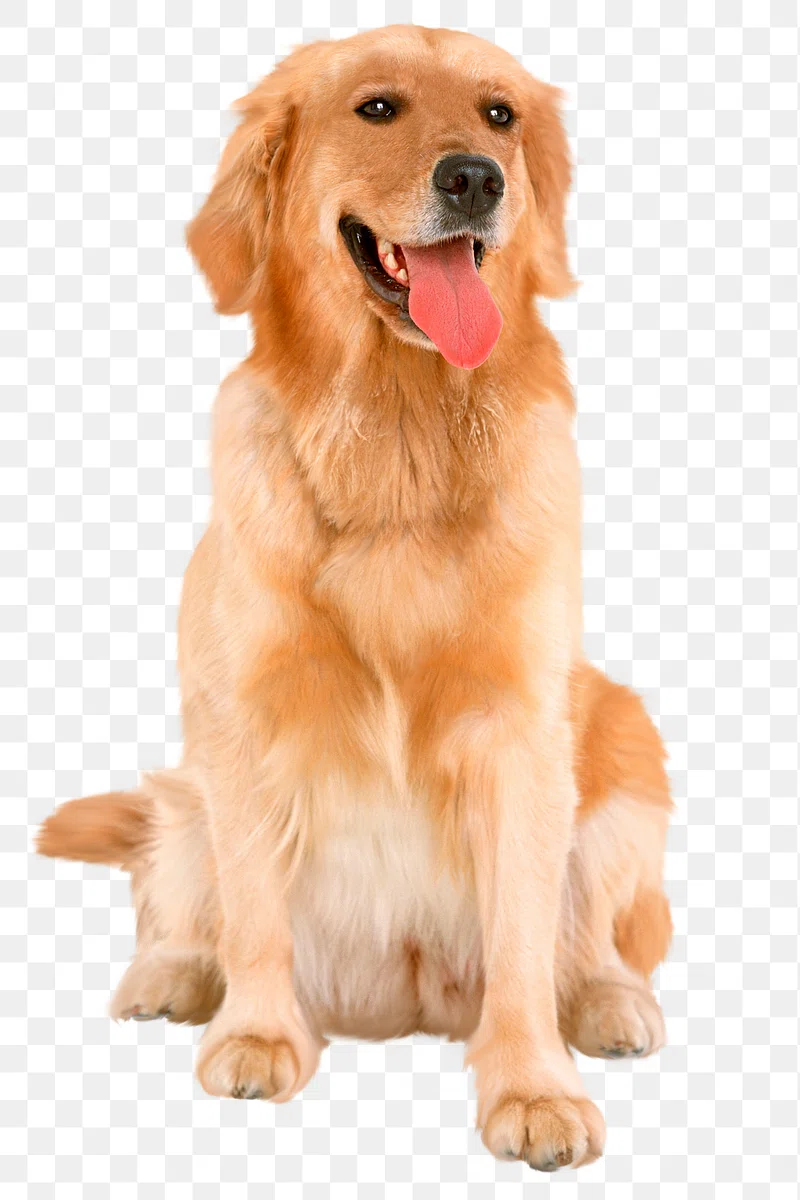

1/1 [==============================] - 0s 82ms/step
[[-1.863276  3.471987]]
1
The image represents a Dog


In [63]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')